In [10]:
#HW 4 Devin Fan 918042189
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [13]:
# Problem 2: Calculate the enthalpy of reaction and the Gibbs free energy change of the reaction.

delta_H = 190-12  # Enthalpy change in kJ/mol
delta_S = 247.9 - 220.96  # Entropy change in J/(mol·K)
temperature = 298  # Temperature in K

# Calculate the Gibbs free energy change
delta_G = delta_H - (temperature * delta_S / 1000)  # Conversion of entropy change from J to kJ

# Print the results
print("Enthalpy of reaction (ΔH): {} kJ/mol".format(delta_H))
print("Gibbs free energy change (ΔG): {} kJ/mol".format(delta_G))

Enthalpy of reaction (ΔH): 178 kJ/mol
Gibbs free energy change (ΔG): 169.97188 kJ/mol


In [14]:
# Problem 3: Calculate the equilibrium constant at 298 K

# Constants
R = 8.314  # Gas constant in J/(mol·K)
temperature = 298  # Temperature in K

# Calculate the equilibrium constant
K = np.exp(-delta_G / (R * temperature))

# Print the result
print("Equilibrium constant (K) at 298 K: {:.4f}".format(K))

Equilibrium constant (K) at 298 K: 0.9337


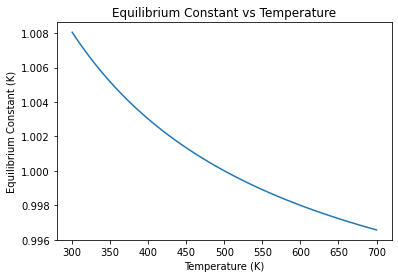

In [15]:
# Problem 4: Estimate the equilibrium constant as a function of temperature (300 - 700 K)

T_range = np.linspace(300, 700, 100)  # Temperature range from 300 to 700 K

# Calculate equilibrium constant (K) as a function of temperature
K = np.exp(-deltaG / (8.314 * T_range))

# Plotting
plt.plot(T_range, K)
plt.xlabel('Temperature (K)')
plt.ylabel('Equilibrium Constant (K)')
plt.title('Equilibrium Constant vs Temperature')
plt.show()

In [17]:
# Problem 5: Estimate the final composition at 298 K and 1 bar

# Initial amounts
initial_TL = 5  # Initial moles of toluene (TL)
initial_MCH = 5  # Initial moles of methyl cyclohexane (MCH)
initial_H2 = 10  # Initial moles of hydrogen gas (H2)

# Stoichiometry of the reaction
stoichiometry_TL = -1  # Change in moles of TL
stoichiometry_MCH = 1  # Change in moles of MCH
stoichiometry_H2 = -3  # Change in moles of H2

# Calculate final amounts
final_TL = initial_TL + stoichiometry_TL
final_MCH = initial_MCH + stoichiometry_MCH
final_H2 = initial_H2 + stoichiometry_H2

# Print the final composition
print("Final composition:")
print("Toluene (TL): {} mol".format(final_TL))
print("Methyl cyclohexane (MCH): {} mol".format(final_MCH))
print("Hydrogen gas (H2): {} mol".format(final_H2))

Final composition:
Toluene (TL): 4 mol
Methyl cyclohexane (MCH): 6 mol
Hydrogen gas (H2): 7 mol


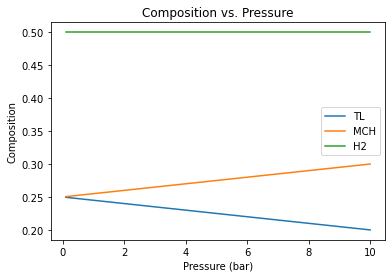

In [29]:
# Problem 6: Plot the results at different pressures

pressures = np.arange(0.1, 10.1, 0.1)  

TL_compositions = []  
MCH_compositions = []  
H2_compositions = []  

for pressure in pressures:
    # Perform calculations to estimate compositions at different pressures
    TL_compositions.append((initial_TL - 0.1 * pressure) / (initial_TL + initial_MCH + initial_H2))
    MCH_compositions.append((initial_MCH + 0.1 * pressure) / (initial_TL + initial_MCH + initial_H2))
    H2_compositions.append(initial_H2 / (initial_TL + initial_MCH + initial_H2))

# Plot the results for different pressures
plt.plot(pressures, TL_compositions, label='TL')
plt.plot(pressures, MCH_compositions, label='MCH')
plt.plot(pressures, H2_compositions, label='H2')
plt.xlabel('Pressure (bar)')
plt.ylabel('Composition')
plt.title('Composition vs. Pressure')
plt.legend()
plt.show()

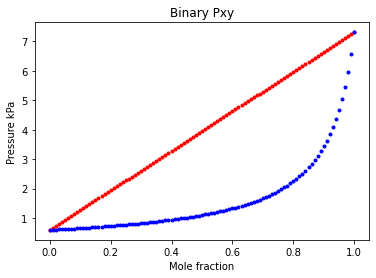

In [28]:
ant_mch = [6.85146, 1206.47, 223.136 ]
ant_tl = [4.14157/101, 1377.578/101, -50.507/101]
def antoine(T,A,B,C):
  return np.exp(A - B / (T + C))

p1sat = antoine(25,*ant_mch)
p2sat = antoine(25,*ant_tl)

for mol in np.linspace(0,1,101):
  x1_mol = mol
  x2_mol = 1 - x1_mol 
  bubblep = x1_mol*p1sat + x2_mol*p2sat  
  plt.plot(x1_mol,bubblep,'.r')
  mol_y1 = mol
  dewp = 1 /(mol_y1/(p1sat) + (1-mol_y1)/(p2sat))
  plt.plot(mol_y1,dewp,'.b')
  plt.xlabel('Mole fraction')
  plt.ylabel('Pressure kPa')
  plt.title('Binary Pxy')
plt.show()

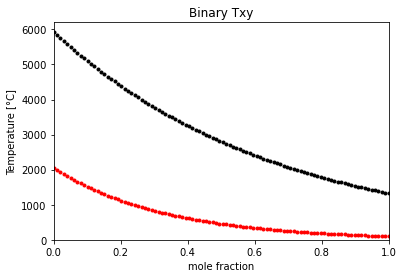

In [95]:
A1=ant_mch[0]
B1=ant_mch[1]
C1=ant_mch[2]
A2=ant_tl[0]
B2=ant_tl[1]
C2=ant_tl[2]

def BubbleT(T,x1,x2):
  return x1*np.exp(A1-B1/(T+C1))+x2*np.exp(A2-B2/(T+C2))-100

def DewT(T,y1,y2):
  return 1/(y1/np.exp(A1-B1/(T+C1))+y2/np.exp(A2-B2/(T+C2)))-100

Tbubble = np.linspace(298,1,399)
Tdew = np.linspace(298,1,399)
xmol = np.linspace(298,1,399)

for i in range(100):
  x1=xmol[i]
  x2=1-x1
  data = (x1,x2)
  Tbubble[i] = fsolve(BubbleT,1000,args=data)

for i in range(100):
  y1=xmol[i]
  y2=1-y1
  data2 = (y1,y2)
  Tdew[i] = fsolve(DewT,3000,args=data2)

plt.plot(xmol,Tbubble,'.k')
plt.plot(xmol,Tdew,'.r')
plt.xlabel('mole fraction')
plt.ylabel('Temperature [°C]')
plt.title('Binary Txy')
plt.show()